In [1]:
pip install xgboost

In [2]:
pip install xgbfir

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing neccessary libraries

import pandas as pd
import numpy as np
from numpy import sort
from collections import OrderedDict

# Data Visualisation libraries

import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as sci


# Importing machine learning libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost
import xgbfir

## Feature extraction libraries

from sklearn.feature_selection import SelectFromModel

# Libraries XGBRegressoror validation matrix

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import learning_curve

In [4]:
# Lading the Data

data = pd.read_excel('Capstone Project.xlsx')

In [5]:
data.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [6]:
# Creating backup of the original data

In [7]:
data_copy1 = data

In [8]:
data_copy2 = data

In [9]:
data.tail()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61

In [10]:
# Viewing the basic descriptive statistics

data.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [11]:
# Building Custom Summary function for EDA report

In [12]:
def custom_summry(df):
    
    result = []         # Creating an empty list called result 
    
    # Iterating all the columns in the data for studying Descriptive stats
    
    for col in df.columns:
        stats = OrderedDict({"Feature Name":col,
                             'Count':df[col].count(),
                            'Minimum':df[col].min(),
                            'Quartile1':df[col].quantile(0.25),
                            'Mean':df[col].mean(),
                            'Median':df[col].median(),
                            'Quartile3':df[col].quantile(0.75),
                            'IQR':(df[col].quantile(0.75)-df[col].quantile(0.25)),
                            'Maximum':df[col].max(),
                            'Variance':df[col].var(),
                            'Standard Deviation':df[col].std(),
                            'Skewness':df[col].skew(),
                            'Kurtosis':df[col].kurt()})
        
        #custom comment for identifying skew 
        
        if df[col].skew()<-1:
            sk_label = 'highly Negatively Skewed'
        elif -1<= df[col].skew() < -0.5:
            sk_label = 'Moderately Negatively Skewed'
        elif -0.5 <= df[col].skew() <0:
            sk_label = 'Fairly Symmetric(-ve)'
        elif 0 <= df[col].skew() < 0.5:
            sk_label = 'Fairly Symmetric(+ve)'
        elif 0.5 <= df[col].skew() <1:
            sk_label = 'Moderately Skewed (+ve)'
        elif df[col].skew() >1:
            sk_label = 'Higly (+ve) Skewed'
        else:
            sk_label = 'error'
        stats['Skeweness Comment'] = sk_label
        
        #custom comment for identifying Outliers
        
        uplim = stats['Quartile3'] + 1.5 * stats['IQR']
        lowlim = stats['Quartile1'] - 1.5 * stats['IQR']
        if len([x for x in data[col] if x < lowlim or x > uplim])> 0:
            outlier_comment = 'Has outlier'
        else:
            outlier_comment = 'No outlier'
            
        stats['outlier_comment']= outlier_comment
        
            
        result.append(stats)
    summary_df = pd.DataFrame(data=result)
    return summary_df

In [13]:
custom_summry(data)

Feature Name  Count  Minimum  Quartile1        Mean   Median  Quartile3  \
0        cement   1030   102.00    192.375  281.167864  272.900    350.000   
1          slag   1030     0.00      0.000   73.895825   22.000    142.950   
2           ash   1030     0.00      0.000   54.188350    0.000    118.300   
3         water   1030   121.80    164.900  181.567282  185.000    192.000   
4  superplastic   1030     0.00      0.000    6.204660    6.400     10.200   
5     coarseagg   1030   801.00    932.000  972.918932  968.000   1029.400   
6       fineagg   1030   594.00    730.950  773.580485  779.500    824.000   
7           age   1030     1.00      7.000   45.662136   28.000     56.000   
8      strength   1030     2.33     23.710   35.817961   34.445     46.135   

       IQR  Maximum      Variance  Standard Deviation  Skewness   Kurtosis  \
0  157.625    540.0  10921.580220          104.506364  0.509481  -0.520652   
1  142.950    359.4   7444.124812           86.279342  0.800717  -0.508175   
2  118.300    200.1   4095.616541           63.997004  0.537354  -1.328746   
3   27.100    247.0    456.002651           21.354219  0.074628   0.122082   
4   10.200     32.2     35.686781            5.973841  0.907203   1.411269   
5   97.400   1145.0   6045.677357           77.753954 -0.040220  -0.599016   
6   93.050    992.6   6428.187792           80.175980 -0.253010  -0.102177   
7   49.000    365.0   3990.437729           63.169912  3.269177  12.168989   
8   22.425     82.6    279.081814           16.705742  0.416977  -0.313725   

         Skeweness Comment outlier_comment  
0  Moderately Skewed (+ve)      No outlier  
1  Moderately Skewed (+ve)     Has outlier  
2  Moderately Skewed (+ve)      No outlier  
3    Fairly Symmetric(+ve)     Has outlier  
4  Moderately Skewed (+ve)     Has outlier  
5    Fairly Symmetric(-ve)      No outlier  
6    Fairly Symmetric(-ve)     Has outlier  
7       Higly (+ve) Skewed     Has outlier  
8    Fairly Symmetric(+ve)     Has outlier

In [14]:
# Building a function to treat outliers

def replace_outlier(data,col,method='quartile',strategy='median'):
    
    col_data = data[col]
    
    # Using method 1: Quartile
    if method == 'quartile':
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3 - q1
        upper_imit = q3 + 1.5 * IQR
        lower_limit = q1 - 1.5 * IQR
        
    # Using method 2: Standard Deviation
    elif method == 'standard deviation':
        col_mean = data[col].mean()
        col_sdv = data[col].std()
        limit = 2*col_sdv 
        up_lim = col_mean + limit
        low_lim = col_mean -limit
        
        
    else :
        print('Pass a correct method')
    # Displaying the outliers
    outliers = data.loc[(col_data<lower_limit )|( col_data>upper_imit), col]
    outliers_percentage = round(len(outliers)/len(data),2)
    
    if len(outliers) == 0:
        print(f'The {col} has no outliers')
    else:
        print(f'The {col} has {len(outliers)} outliers')
        print('Outlier percentage:',outliers_percentage)
        print(f'The {col} has outlier values:',np.sort(np.array(outliers)))
        display(data.loc[(col_data<lower_limit) | (col_data>upper_imit), col])



# Replacing Outliers

# Using strategy 1 that is 'median'

    if strategy == 'median':
        data.loc[(col_data<lower_limit )|( col_data>upper_imit), col] = data[col].median()

# Using straegy 2 that is 'mean'

    elif strategy == 'mean':
            data.loc[(col_data<low_lim) |( col_data>up_lim,col)] = data[col].mean()

    else:
        print('Pass a correct strategy')


    return data


In [15]:
# Building ODT plots 

# ODT consist of 3 plots Boxplot(descriptive stats),Distribution with outliers and Distribution without outliers



In [16]:
def ODT_plots(data,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,20))
    
    kwargs={'fontsize' :20, 'color':'black'} # kwargs for Common Arguments

    # Descriptive Stats
    sns.boxplot(data[col],ax = ax1,color='blue')
    ax1.set_title(col+' '+'boxplot',**kwargs)
    ax1.set_xlabel('Boxplot',**kwargs)
    ax1.set_ylabel('values',**kwargs)

   # plotting histogram with outliers
    sns.distplot(data[col],ax = ax2,color='red',fit = sci.norm)
    ax2.axvline(data[col].mean(),color = 'green')
    ax2.axvline(data[col].median(),color = 'blue')
    ax2.set_title(col+' '+'Histogram with outliers ',**kwargs)
    ax2.set_xlabel('density',**kwargs)
    ax2.set_ylabel('values',**kwargs)
    
    # plotting histogram without outliers
    # Using function
    y = replace_outlier(data,col)
    sns.distplot(y[col],ax=ax3,color='red',fit=sci.norm)
    ax3.axvline(y[col].mean(),color = 'green')
    ax3.axvline(y[col].median(),color = 'blue')
    ax3.set_title(col+' '+'Histogram without outliers',**kwargs)
    ax3.set_xlabel('density',**kwargs)
    ax3.set_ylabel('values',**kwargs)
    
    plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

The cement has no outliers


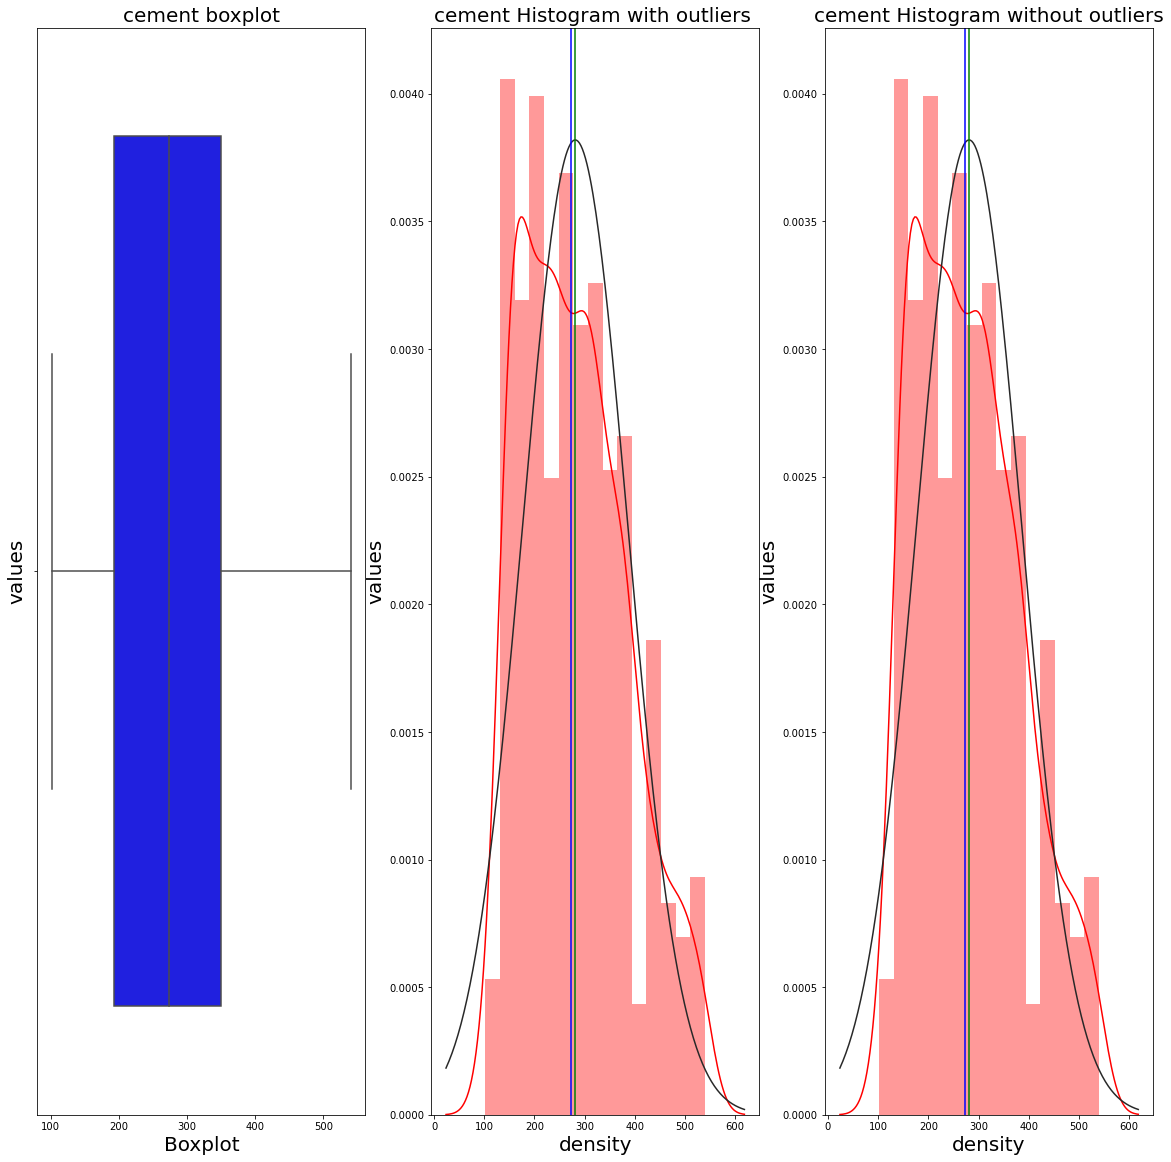

The slag has 2 outliers
Outlier percentage: 0.0
The slag has outlier values: [359.4 359.4]


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


918    359.4
990    359.4
Name: slag, dtype: float64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


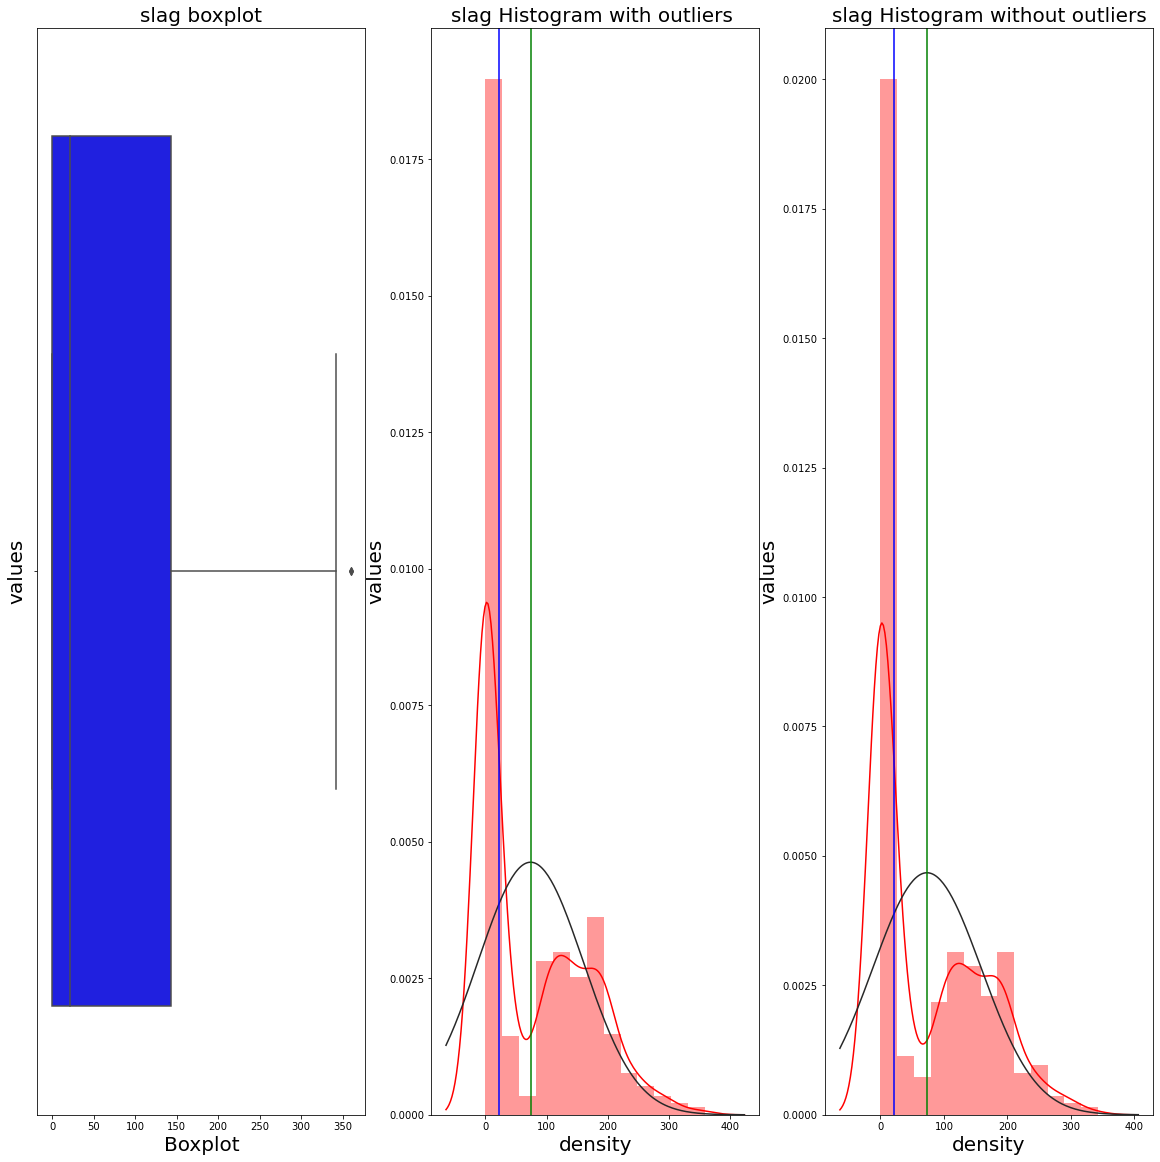

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The ash has no outliers


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


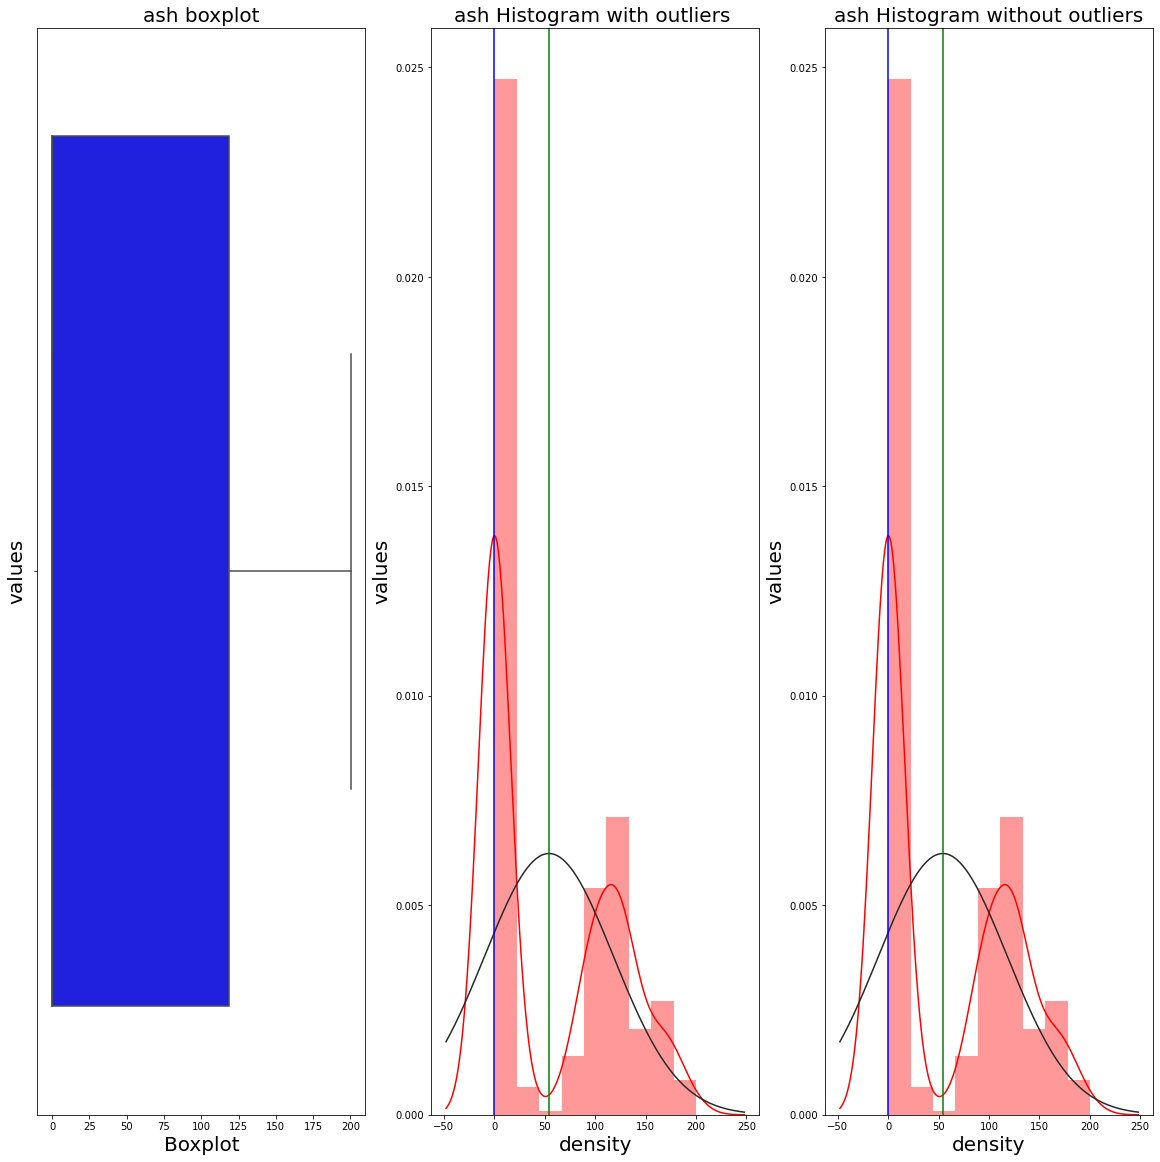

The water has 9 outliers
Outlier percentage: 0.01
The water has outlier values: [121.8 121.8 121.8 121.8 121.8 236.7 237.  246.9 247. ]


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


66     247.0
263    246.9
432    121.8
462    121.8
587    121.8
740    237.0
789    121.8
826    236.7
914    121.8
Name: water, dtype: float64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


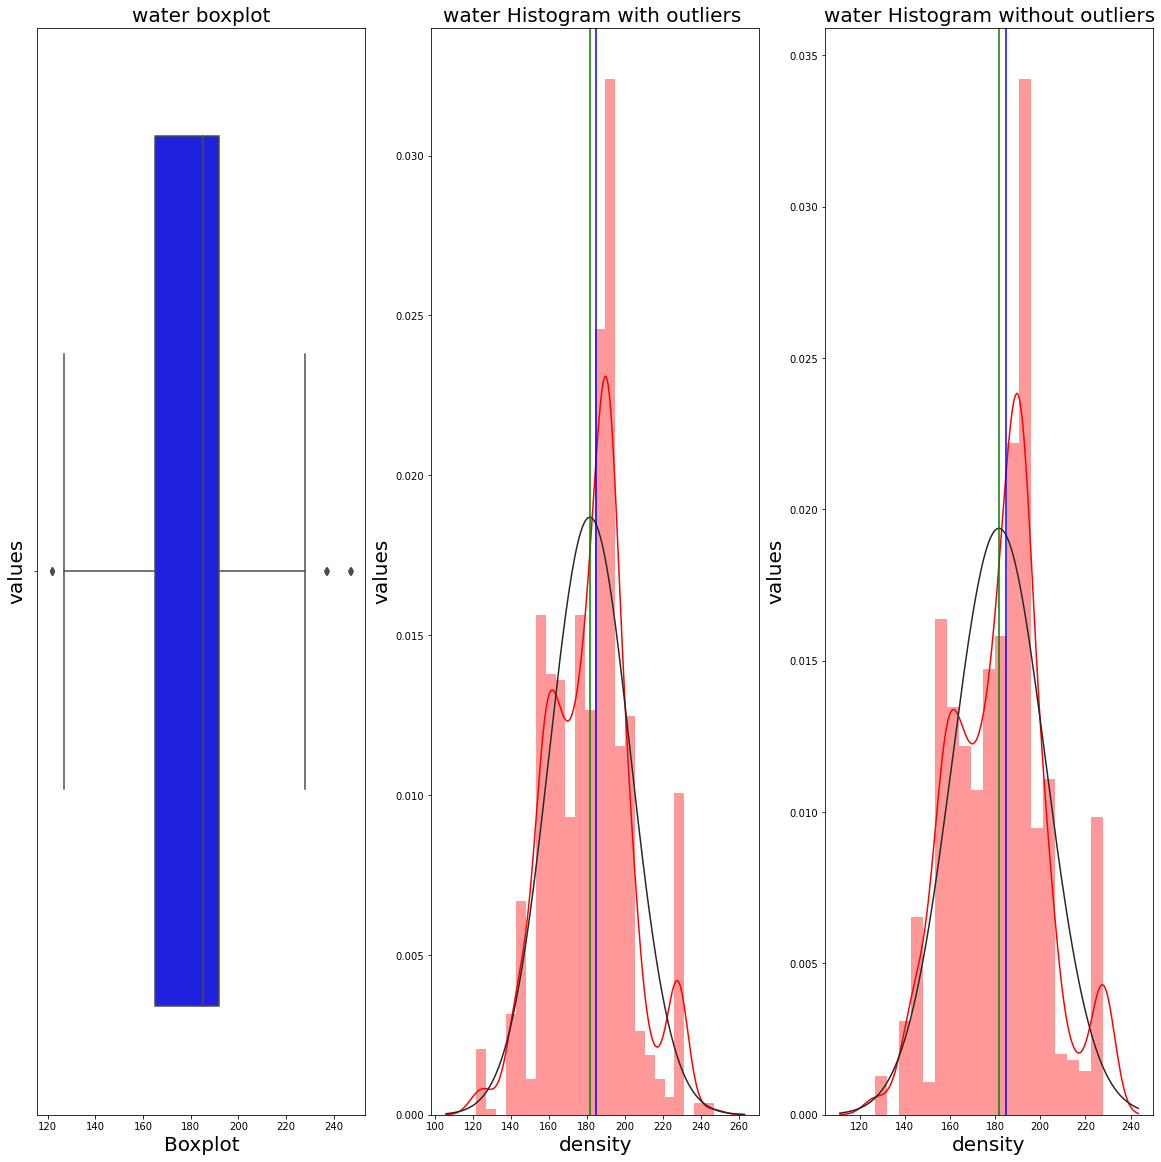

The superplastic has 10 outliers
Outlier percentage: 0.01
The superplastic has outlier values: [28.2 28.2 28.2 28.2 28.2 32.2 32.2 32.2 32.2 32.2]


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


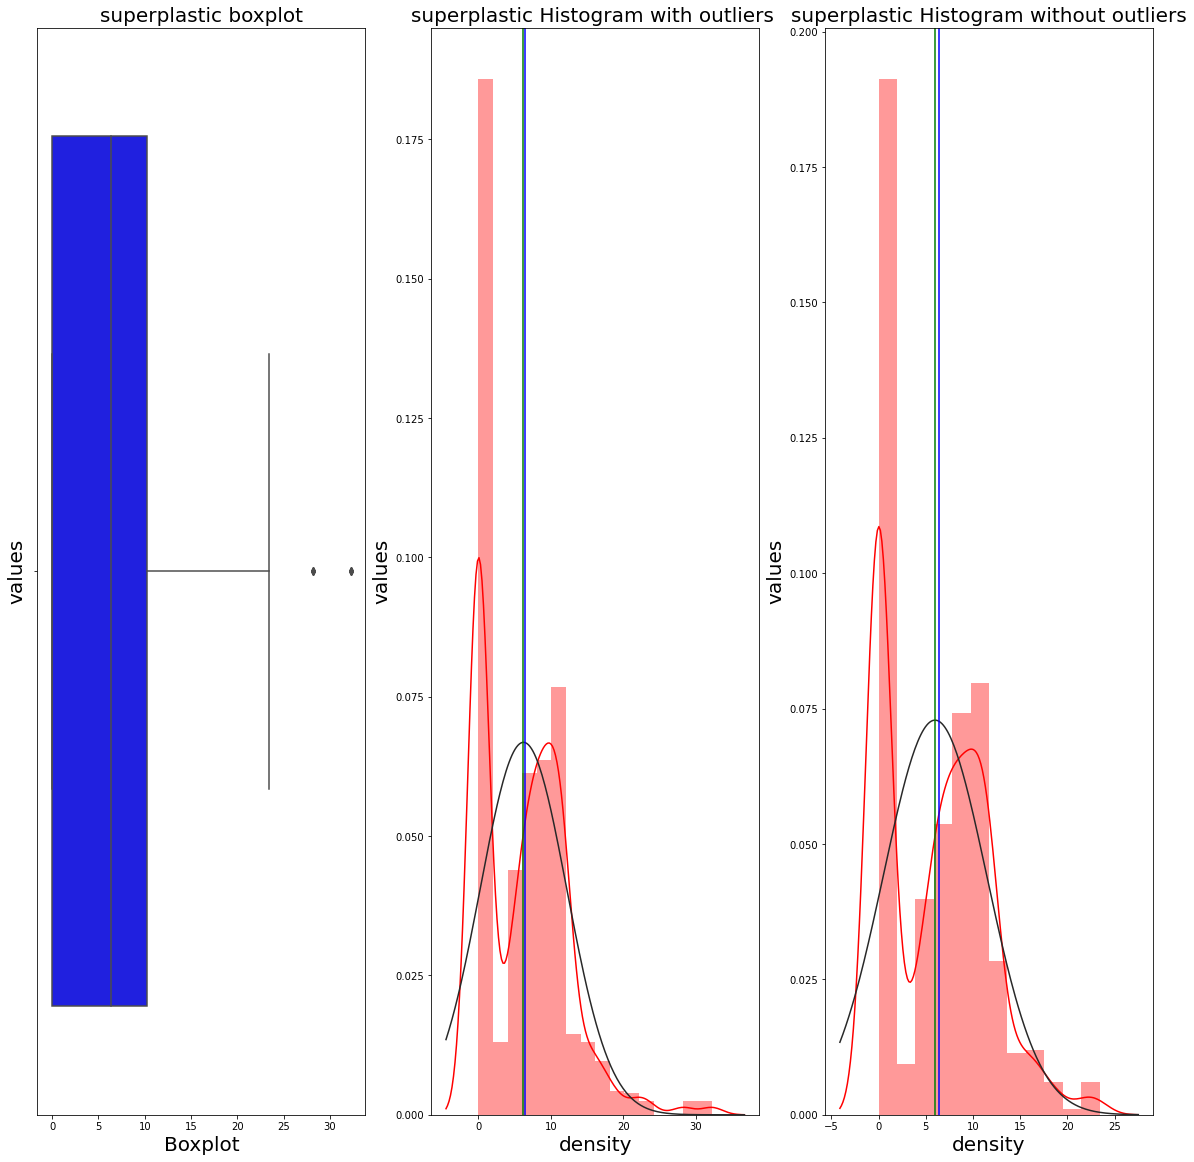

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

The coarseagg has no outliers


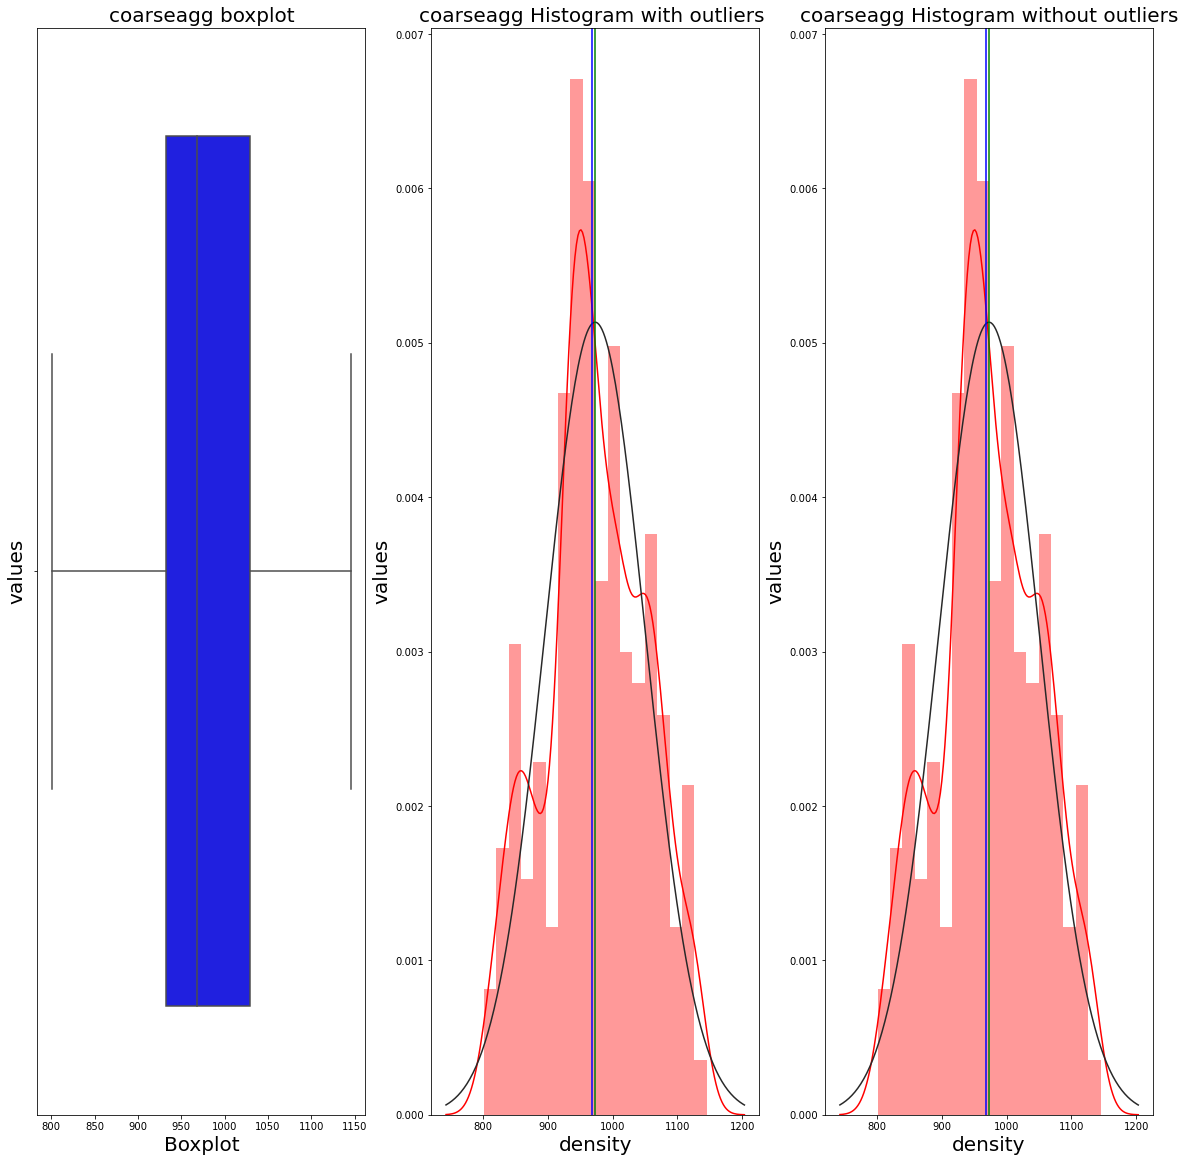

The fineagg has 5 outliers
Outlier percentage: 0.0
The fineagg has outlier values: [992.6 992.6 992.6 992.6 992.6]


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


129    992.6
447    992.6
504    992.6
584    992.6
857    992.6
Name: fineagg, dtype: float64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


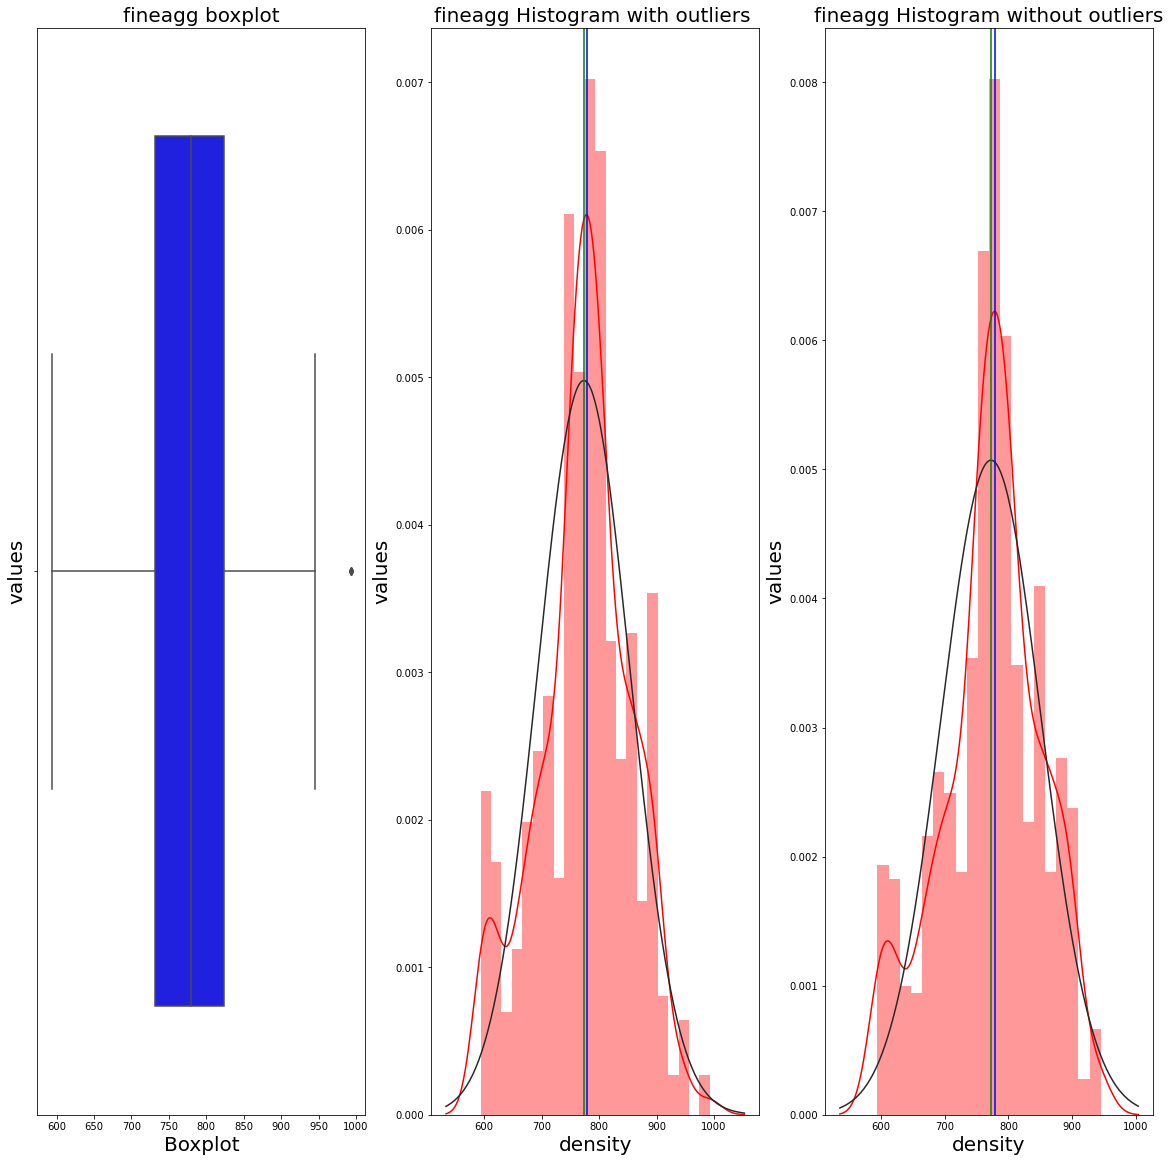

The age has 59 outliers
Outlier percentage: 0.06
The age has outlier values: [180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180 180 270 270 270 270 270 270 270 270 270 270
 270 270 270 360 360 360 360 360 360 365 365 365 365 365 365 365 365 365
 365 365 365 365 365]


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


51      180
64      365
93      180
99      180
103     180
133     365
144     180
149     270
152     180
157     360
159     365
198     365
199     180
207     180
256     270
262     270
270     270
297     270
302     180
312     180
313     270
323     360
359     180
361     360
370     180
393     365
448     360
465     365
484     365
539     180
570     270
581     180
594     180
601     365
620     180
622     180
623     270
632     270
642     180
696     180
713     365
720     365
721     180
754     365
755     360
776     180
850     270
861     180
878     270
900     180
901     365
919     360
951     270
957     365
971     180
985     180
995     365
1017    180
1028    270
Name: age, dtype: int64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


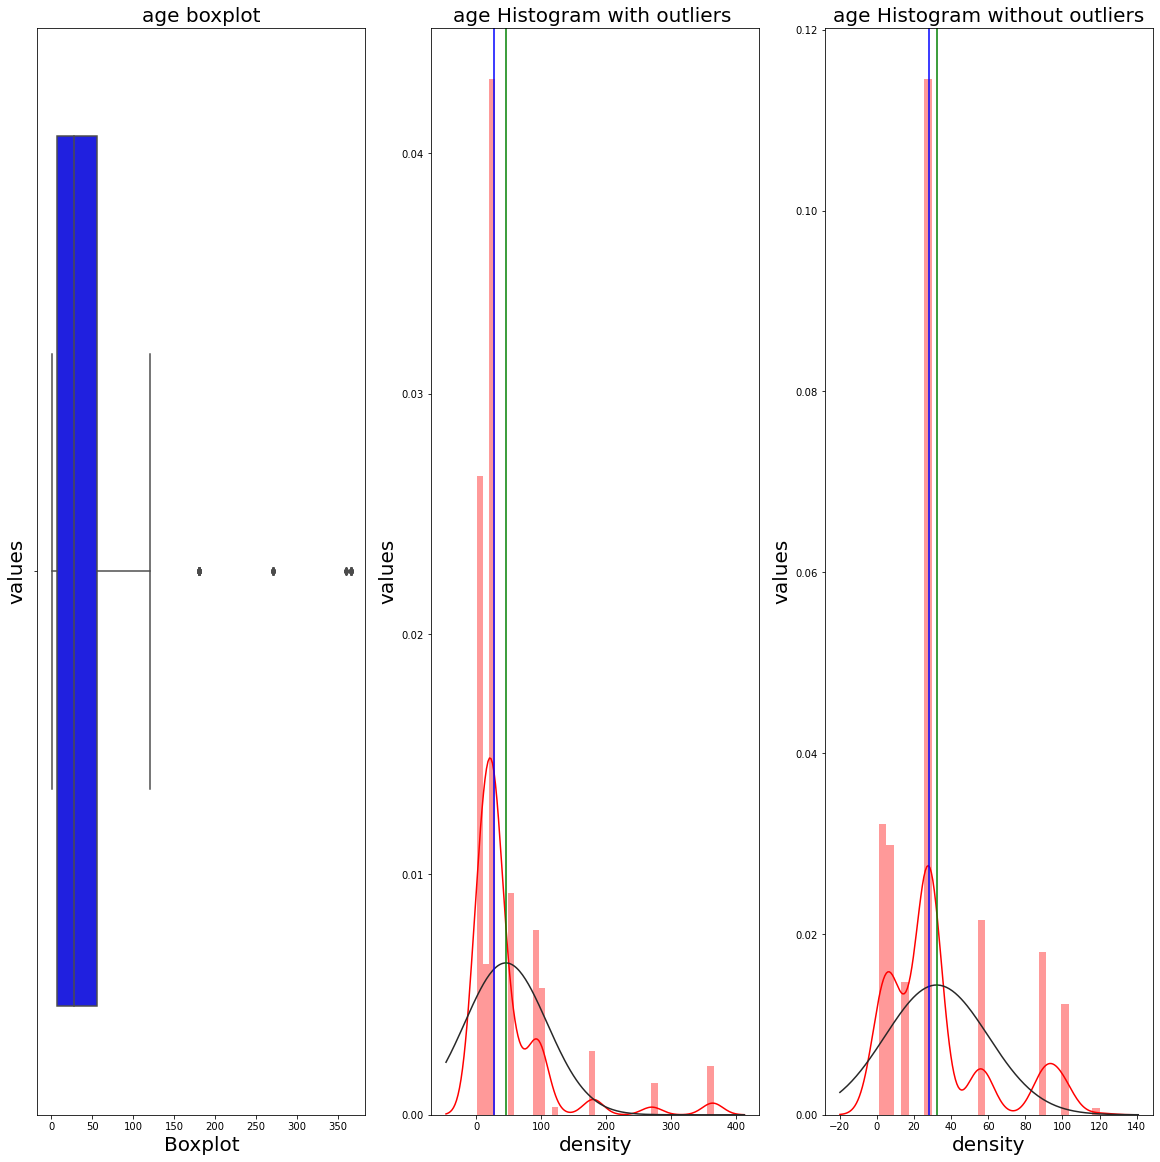

The strength has 4 outliers
Outlier percentage: 0.0
The strength has outlier values: [79.99 80.2  81.75 82.6 ]


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


192     81.75
732     79.99
950     82.60
1003    80.20
Name: strength, dtype: float64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


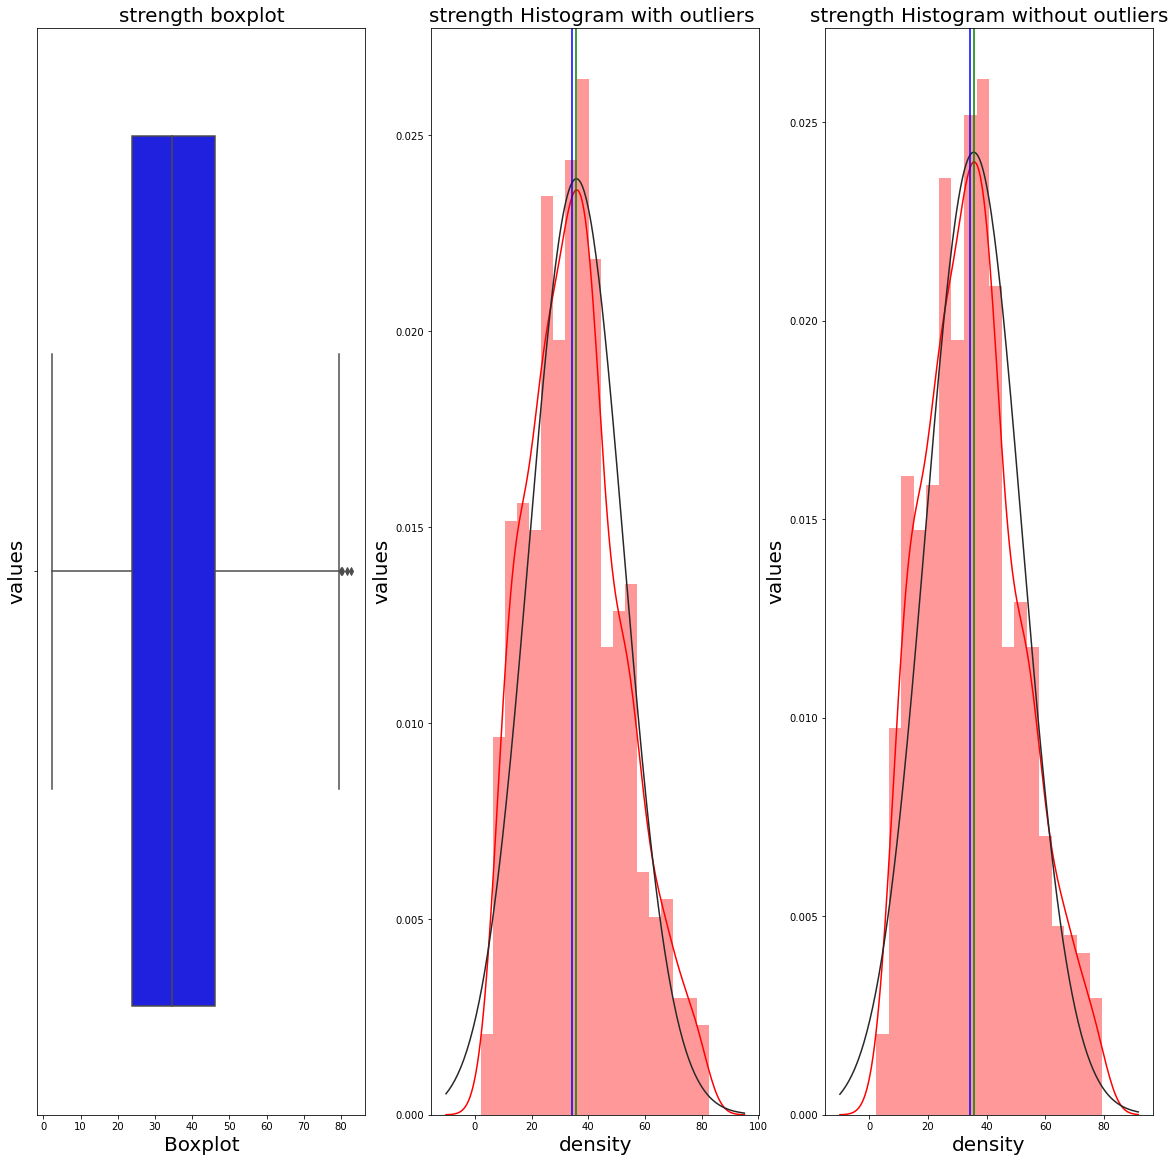

In [17]:
for x in data: 
    ODT_plots(data,x)

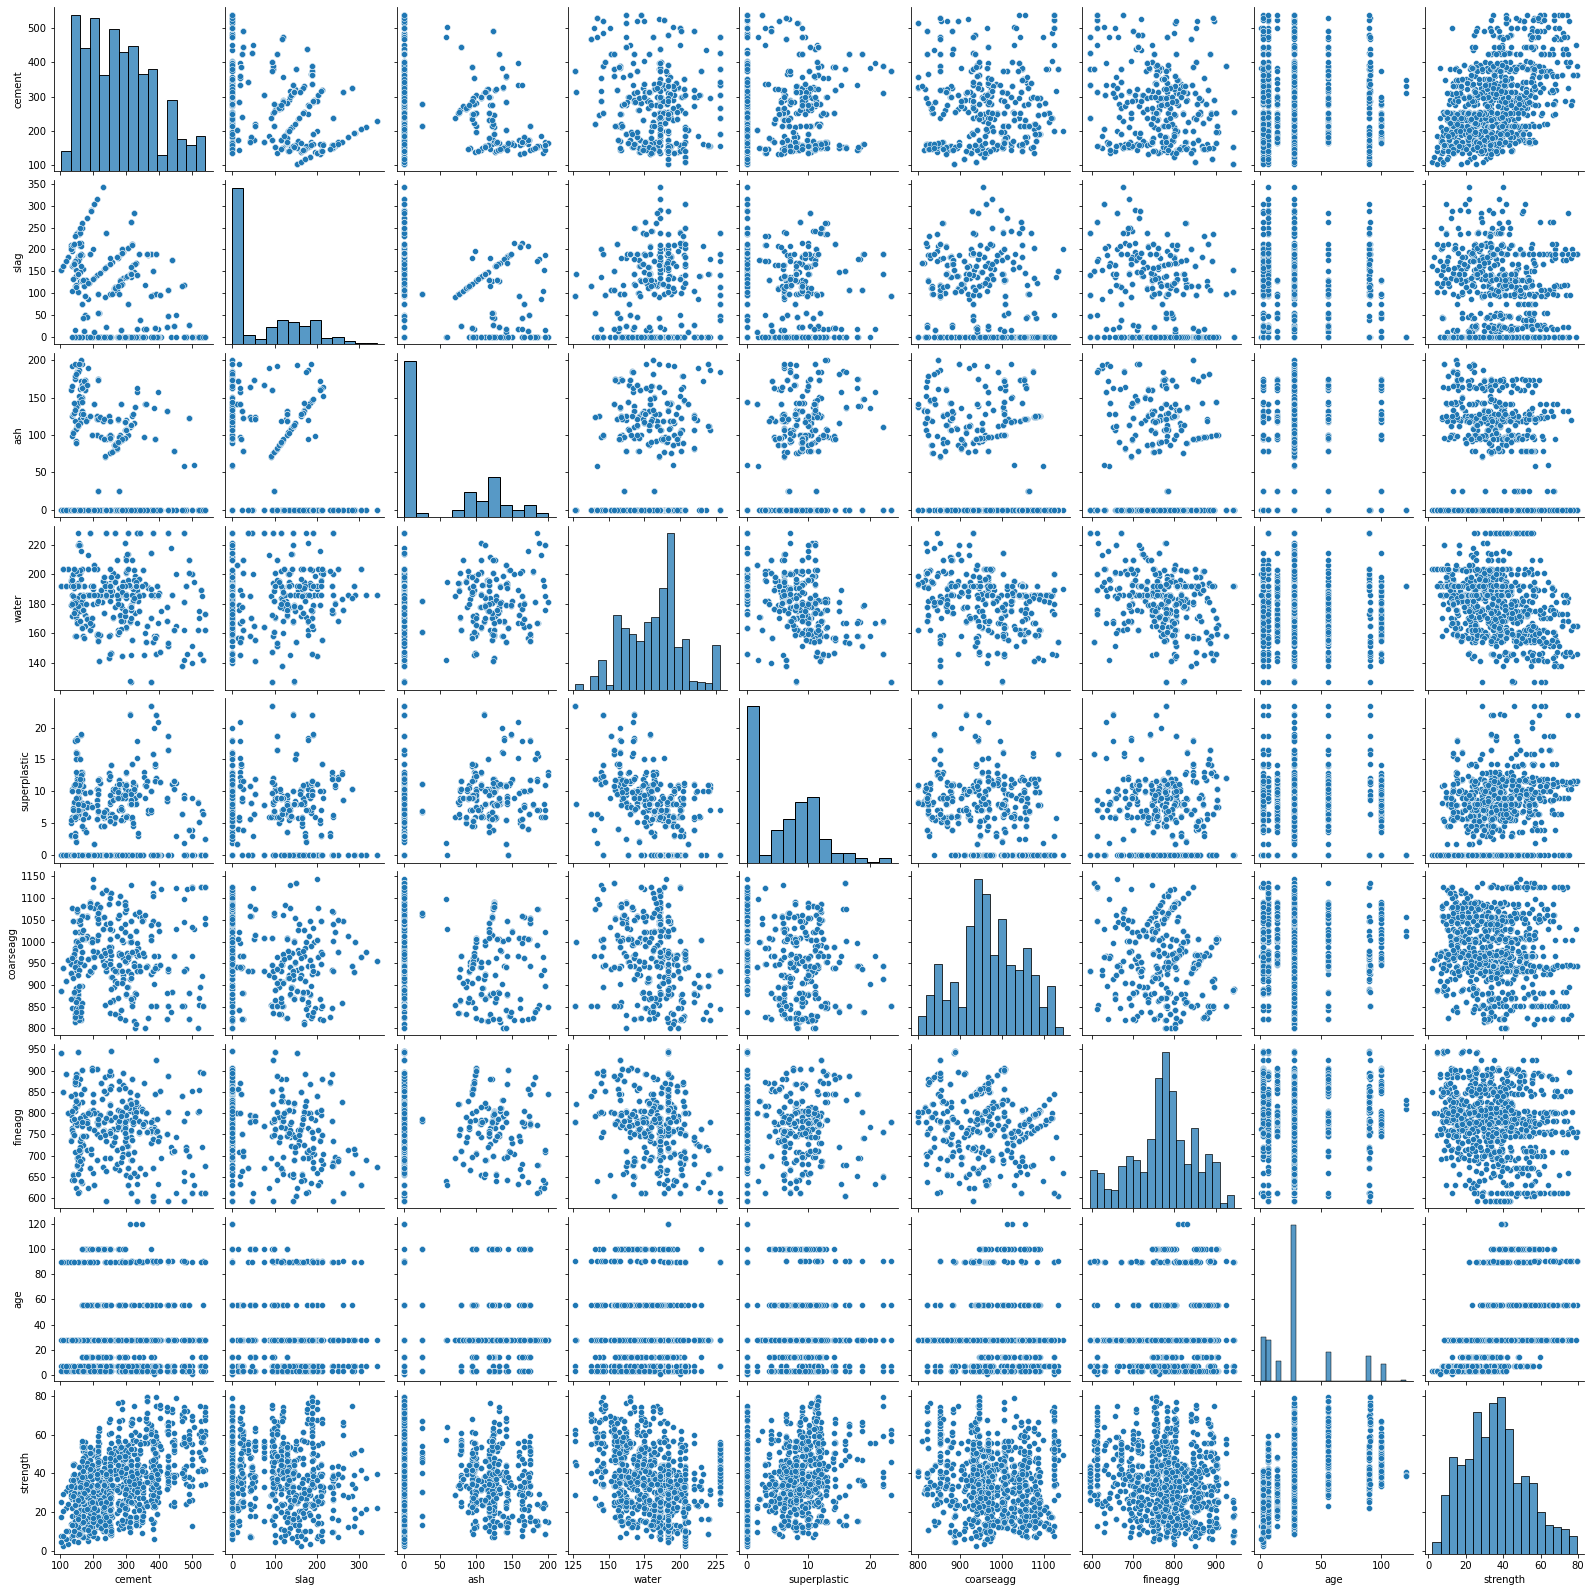

In [18]:
sns.pairplot(data)

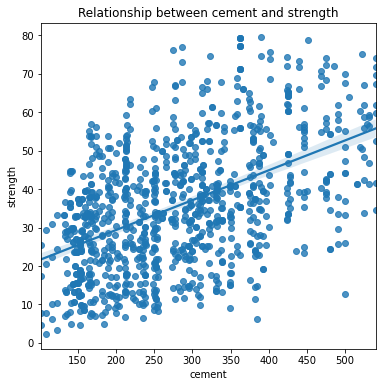

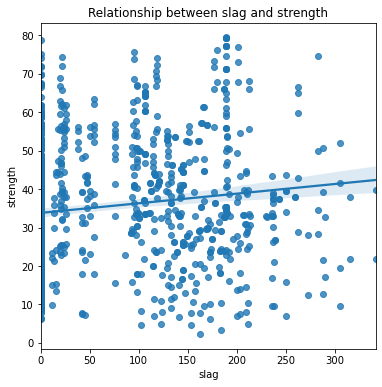

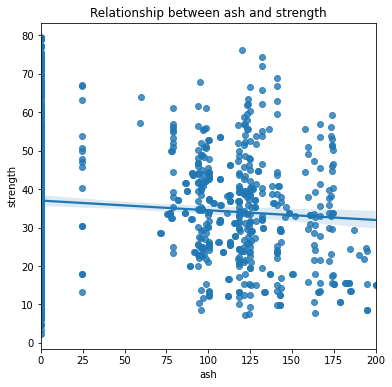

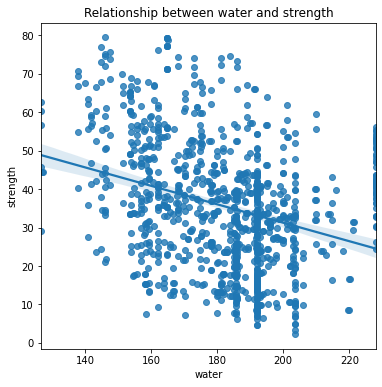

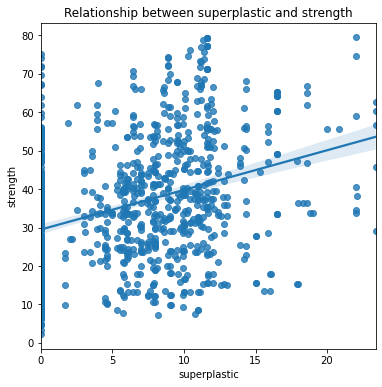

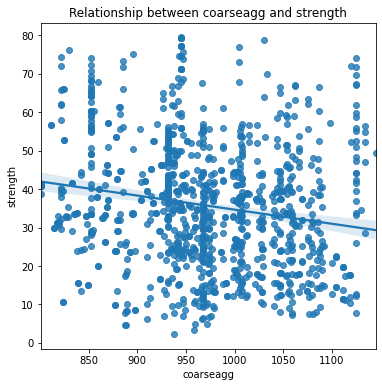

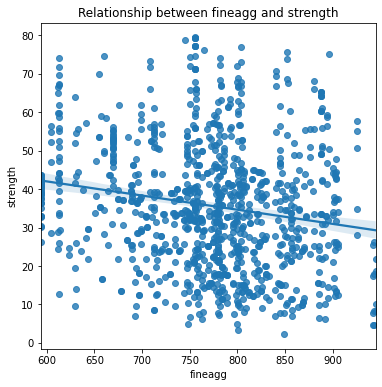

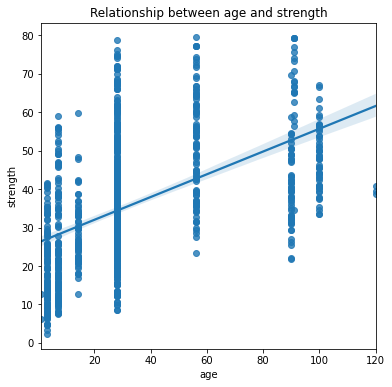

In [19]:
# Multi variate analysis using regression plots
for col in data.columns:
    if col != 'strength':
        f,ax1 = plt.subplots(figsize=(6,6))
        sns.regplot(x=data[col],y=data['strength'],ax=ax1).set_title(f'Relationship between {col} and strength')
        

<AxesSubplot:>

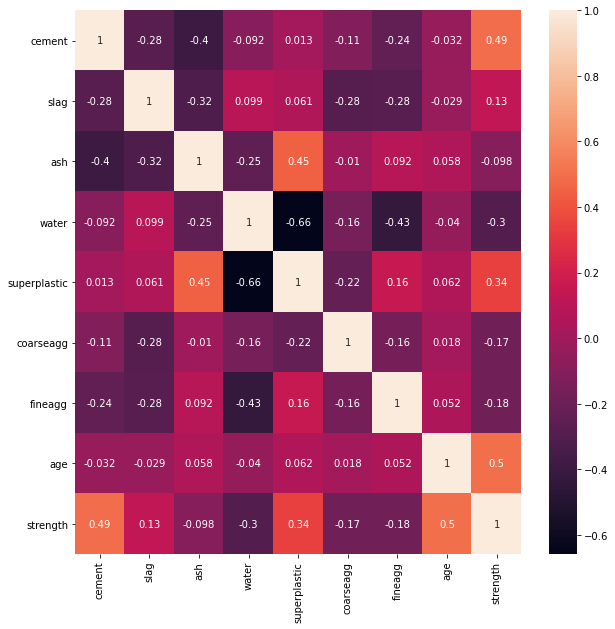

In [20]:
# Plotting Heat Maps

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [21]:
# Correlation of each variable with the target

def corr_with_target(data,tcol):
    ind_var = data.drop([tcol],axis=1).columns
    corr_result = []
    for col in ind_var:
        corr_result.append(data[tcol].corr(data[col]))
    result = pd.DataFrame([ind_var,corr_result],index=['Variables','Correlation']).T.sort_values('Correlation',ascending=False)
    return(result)

In [22]:
corr_with_target(data,'strength')

Variables Correlation
7           age    0.499711
0        cement    0.493518
4  superplastic    0.342633
1          slag    0.129561
2           ash  -0.0979725
5     coarseagg   -0.173234
6       fineagg   -0.176113
3         water   -0.300043

In [23]:
# Variance Inflation factor VIF
 # Its one of the most imp methods to find multicollinearity
 # The formula for VIF = 1/(1-R square)
 # If the VIF value is more than 5, we say that the data is highly multi collinear

# Steps involved in VIF:
# 1. Regress every independent variable with all other independent variables.
# 2. Observe the R square values 
# 3. Calc the VIF formulla 

In [24]:
def vif_collinearity(ind_var):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    result = pd.DataFrame()
    result['vif factor'] = [variance_inflation_factor(ind_var.values,i) for i in range(ind_var.shape[1])]
    result['features'] = ind_var.columns
    return(result.sort_values('vif factor',ascending=False))

In [25]:
vif_collinearity(data.drop('strength',axis=1))

vif factor      features
5   86.938582     coarseagg
3   81.963087         water
6   68.664404       fineagg
0   14.291158        cement
4    5.724145  superplastic
2    4.415840           ash
1    3.342314          slag
7    2.368372           age

In [26]:
# Applying PCA

def apply_pca(x):
    
    
    col = []
    ncomp = len(x.columns)
    
    
    from sklearn.preprocessing import StandardScaler
    x = StandardScaler().fit_transform(x)
    
    
    from sklearn.decomposition import PCA
    
    for i in range(1,ncomp):
        pca = PCA(n_components=i)
        p_comp = pca.fit_transform(x)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1]>0.9:
            ncomp = i
            break
            
            
    print('Explained variance ratio is',evr)
    
    
    for j in range(1,ncomp+1):
        col.append('pc'+str(j))
    
    
    result = pd.DataFrame(p_comp,columns=col)
    
    
    return(result)

In [27]:
transformed_df = apply_pca(data.drop('strength',axis=1))

Explained variance ratio is [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [28]:
transformed_df

pc1       pc2       pc3       pc4       pc5       pc6
0     1.810919  1.331664 -1.284484 -0.306148 -0.067652 -0.886110
1    -1.823833 -0.573436 -1.058973  0.893130 -0.913984 -0.751061
2    -0.739819 -0.463200 -0.541643 -1.033210 -0.308068  0.611045
3     2.766368  0.602978 -0.512532  0.008806  0.086415  0.850548
4     0.892523  0.966627 -0.863624  1.148561 -0.064439 -1.221228
...        ...       ...       ...       ...       ...       ...
1025 -1.743036  0.071059 -1.492203  0.045227 -0.449481  0.968953
1026 -1.079147 -0.572265  3.269799 -1.669125 -0.962953  0.002303
1027 -0.494143  1.276989  0.318398 -0.053272 -0.153787  0.751019
1028  2.688411 -0.236744  0.056551 -0.088955  0.105206  1.368321
1029  1.824507 -2.656185  1.641783  1.924398 -0.624415 -0.394357

[1030 rows x 6 columns]

In [29]:
transformed_df = transformed_df.join(data['strength'],how='left')

In [30]:
transformed_df

pc1       pc2       pc3       pc4       pc5       pc6  strength
0     1.810919  1.331664 -1.284484 -0.306148 -0.067652 -0.886110     29.89
1    -1.823833 -0.573436 -1.058973  0.893130 -0.913984 -0.751061     23.51
2    -0.739819 -0.463200 -0.541643 -1.033210 -0.308068  0.611045     29.22
3     2.766368  0.602978 -0.512532  0.008806  0.086415  0.850548     45.85
4     0.892523  0.966627 -0.863624  1.148561 -0.064439 -1.221228     18.29
...        ...       ...       ...       ...       ...       ...       ...
1025 -1.743036  0.071059 -1.492203  0.045227 -0.449481  0.968953     13.29
1026 -1.079147 -0.572265  3.269799 -1.669125 -0.962953  0.002303     41.30
1027 -0.494143  1.276989  0.318398 -0.053272 -0.153787  0.751019     44.28
1028  2.688411 -0.236744  0.056551 -0.088955  0.105206  1.368321     55.06
1029  1.824507 -2.656185  1.641783  1.924398 -0.624415 -0.394357     52.61

[1030 rows x 7 columns]

In [31]:
# Proceeding for model building 
#1. Normal model building with train test split
#2. Cross Validation
#3. Hyper parameter tuning 

In [32]:
def train_and_test_split(data,tcol,test_size=0.3):
    
    x = data.drop(tcol,axis=1)
    y = data[tcol]
    
    return(train_test_split(x,y,test_size=test_size,random_state=50))

In [33]:
def build_model(mname,m,data,tcol):
    
    x_train,x_test,y_train,y_test = train_and_test_split(data,tcol)
    m.fit(x_train,y_train)
    y_pred = m.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2score = r2_score(y_test,y_pred)
    
    result = [mname,rmse,r2score]
    
    
    return(result)

In [34]:
lr = LinearRegression()

In [35]:
build_model('Linear Regression',lr,transformed_df,'strength')

['Linear Regression', 9.171767967837697, 0.7100371520298293]

In [36]:
# Building Multiple Models 

def mul_models(data,tcol):
    col = ['Model Name','RMSE','RSquare']
    result = pd.DataFrame(columns=col)
    result.loc[len(result)] = build_model('Linear Regression',LinearRegression(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Lasso Regression',Lasso(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Ridge Regression',Ridge(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Decision Tree Regressor',DecisionTreeRegressor(),transformed_df,'strength')
    result.loc[len(result)] = build_model('KNeighbor',KNeighborsRegressor(),transformed_df,'strength')
    result.loc[len(result)] = build_model('SVM',SVR(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Ada Boost',AdaBoostRegressor(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Gradient Boost',GradientBoostingRegressor(),transformed_df,'strength')
    result.loc[len(result)] = build_model('XGBoost',XGBRegressor(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Random Forest',RandomForestRegressor(),transformed_df,'strength')
    
    return(result)

In [37]:
mul_models(transformed_df,'strength')

Model Name      RMSE   RSquare
0        Linear Regression  9.171768  0.710037
1         Lasso Regression  9.625852  0.680615
2         Ridge Regression  9.173294  0.709941
3  Decision Tree Regressor  7.124854  0.825020
4                KNeighbor  8.204468  0.767974
5                      SVM  9.438373  0.692935
6                Ada Boost  8.523843  0.749558
7           Gradient Boost  6.712338  0.844696
8                  XGBoost  6.095381  0.871933
9            Random Forest  5.959993  0.877559

In [38]:
# Building model with cross validation

def kfold_cv(x,y,fold=10):
    
    
    score_lr = cross_val_score(LinearRegression(),x,y,cv=fold)
    score_la = cross_val_score(Lasso(),x,y,cv=fold)
    score_ri = cross_val_score(Ridge(),x,y,cv=fold)  
    score_dt = cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
    score_Knn = cross_val_score(KNeighborsRegressor(),x,y,cv=fold)
    score_svr = cross_val_score(SVR(),x,y,cv=fold)
    score_ad = cross_val_score(AdaBoostRegressor(),x,y,cv=fold)
    score_gb = cross_val_score(GradientBoostingRegressor(),x,y,cv=fold)
    score_xgb = cross_val_score(XGBRegressor(),x,y,cv=fold)
    score_rf = cross_val_score(RandomForestRegressor(),x,y,cv=fold)
             
    models = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor(),RandomForestRegressor()]
    model_names = ['Linear Regression','Lasso Regression','Ridge Regression','DecisionTreeRegression','KNeighborsRegression','SVR','AdaBoostRegression','GradientBoostingRegression','XGBRegression','RandomForestRegression']
    score = [score_lr,score_la,score_ri,score_dt,score_Knn,score_svr,score_ad,score_gb,score_xgb,score_rf]
    
    
    result = []
    
    for i in range(0,len(models)):
        score_mean = np.mean(score[i])
        score_std = np.std(score[i])
        mnames = model_names[i]
        temp_df = [mnames,score_mean,score_std]
        result.append(temp_df)
        
        
    result_df = pd.DataFrame(result,columns=['Model Names','Score Mean','Score Std'])
    
    return(result_df.sort_values('Score Mean',ascending=False))
    
    
    
    
    

In [39]:
kfold_cv(transformed_df.drop('strength',axis=1),transformed_df['strength'])

Model Names  Score Mean  Score Std
8               XGBRegression    0.873262   0.036061
9      RandomForestRegression    0.867634   0.034994
7  GradientBoostingRegression    0.829031   0.050494
4        KNeighborsRegression    0.767697   0.055603
3      DecisionTreeRegression    0.762555   0.054144
6          AdaBoostRegression    0.728066   0.037312
5                         SVR    0.703117   0.042765
2            Ridge Regression    0.663935   0.059437
0           Linear Regression    0.663928   0.059476
1            Lasso Regression    0.649837   0.049887

In [40]:
# Hyper parameter tuning 

def tuning_model(x,y,fold=10):
    
    
    # Listing the parameters
    
    param_las = {'alpha':[1e-16,1e-14,1e-12,1e-10,1e-08,1e-06,1e-04,1e-02,1e-00,1,2,4,6,8,10,12,14,16,18,20,30,40,50,60,80,90,100,200,300,400,500,650,750,850,950,1000]}
    param_ri = {'alpha':[1e-16,1e-14,1e-12,1e-10,1e-08,1e-06,1e-04,1e-02,1e-00,1,2,4,6,8,10,12,14,16,18,20,30,40,50,60,80,90,100,200,300,400,500,650,750,850,950,1000]}
    param_svm = {'kernel':['linear','rbf','sigmoid','poly'],'gamma':['scale','auto']}
    param_rf = {'n_estimators':[5,10,15,20,25,40,45,60,65,80,95,100,115,200,300,400,500,600,700,800,999,1000]}
    param_Kn = {'n_neighbors':[0,1,2,3,4,5,10,15,20,25,40,45,60,65,80,95,100,115,200,300,400,500,600,700,800,999,1000]}
    param_xg = {'alpha':[0,1],'gamma':[10,20,30,40,50,60,70,80,90,100],'reg_lamda':[0,1]}
    
    # Hyper parameter tuning using grid search cv
    
    tune_las = GridSearchCV(Lasso(),param_las,cv=fold) 
    tune_ri = GridSearchCV(Ridge(),param_ri,cv=fold)
    tune_svm = GridSearchCV(SVR(),param_svm,cv=fold)
    tune_rf = GridSearchCV(RandomForestRegressor(),param_rf,cv=fold)
    tune_Kn = GridSearchCV(KNeighborsRegressor(),param_Kn,cv=fold)
    tune_xg = GridSearchCV(XGBRegressor(),param_xg,cv=fold)
    
    # Fitting the data
    
    tune_las.fit(x,y)
    tune_ri.fit(x,y)
    tune_svm.fit(x,y)
    tune_rf.fit(x,y)
    tune_Kn.fit(x,y)
    tune_xg.fit(x,y)
    
    tuned = [tune_las,tune_ri,tune_svm,tune_rf,tune_Kn,tune_xg]
    names = ['Lasso','Ridge','SVM','Random Forest','Knn','XGBoost']
    
    for i in range(0,len(tuned)):
        print('Model',names[i])
        print('Best Value',tuned[i].best_params_)
        
        
        

In [41]:
tuning_model(transformed_df.drop('strength',axis=1),transformed_df['strength'])

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40421.68694692528, tolerance: 25.892099378176912
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35948.2481647895, tolerance: 25.03670756417476
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36393.84945060241, tolerance: 24.58893286581445
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: O

[19:32:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:32:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:32:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bi

In [42]:
# Building model using the hyperparameters 

def kfold_cv_hyperparametertuning(x,y,fold=10):
    
    
    score_lr = cross_val_score(LinearRegression(),x,y,cv=fold)
    score_la = cross_val_score(Lasso(alpha=0.01),x,y,cv=fold)
    score_ri = cross_val_score(Ridge(alpha=6),x,y,cv=fold)  
    score_dt = cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
    score_Knn = cross_val_score(KNeighborsRegressor(n_neighbors=4),x,y,cv=fold)
    score_svr = cross_val_score(SVR(gamma='scale',kernel='rbf'),x,y,cv=fold)
    score_ad = cross_val_score(AdaBoostRegressor(),x,y,cv=fold)
    score_gb = cross_val_score(GradientBoostingRegressor(),x,y,cv=fold)
    score_xgb = cross_val_score(XGBRegressor(alpha=1,gamma=10,reg_lamda=0),x,y,cv=fold)
    score_rf = cross_val_score(RandomForestRegressor(n_estimators=1000),x,y,cv=fold)
             
    models = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor(),RandomForestRegressor()]
    model_names = ['Linear Regression','Lasso Regression','Ridge Regression','DecisionTreeRegression','KNeighborsRegression','SVR','AdaBoostRegression','GradientBoostingRegression','XGBRegression','RandomForestRegression']
    score = [score_lr,score_la,score_ri,score_dt,score_Knn,score_svr,score_ad,score_gb,score_xgb,score_rf]
    
    
    result = []
    
    for i in range(0,len(models)):
        score_mean = np.mean(score[i])
        score_std = np.std(score[i])
        mnames = model_names[i]
        temp_df = [mnames,score_mean,score_std]
        result.append(temp_df)
        
        
    result_df = pd.DataFrame(result,columns=['Model Names','Score Mean','Score Std'])
    
    return(result_df.sort_values('Score Mean',ascending=False))
    

In [43]:
kfold_cv_hyperparametertuning(transformed_df.drop('strength',axis=1),transformed_df['strength'])

[20:13:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:13:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:15:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bi

Model Names  Score Mean  Score Std
9      RandomForestRegression    0.867660   0.032276
8               XGBRegression    0.866822   0.028699
7  GradientBoostingRegression    0.829336   0.050331
4        KNeighborsRegression    0.771057   0.054397
3      DecisionTreeRegression    0.764297   0.059059
6          AdaBoostRegression    0.729198   0.036793
5                         SVR    0.703117   0.042765
1            Lasso Regression    0.663970   0.059370
2            Ridge Regression    0.663951   0.059242
0           Linear Regression    0.663928   0.059476

In [44]:
# Clustering 

from sklearn.cluster import KMeans



In [45]:
x = data.drop('strength',axis=1)

In [46]:
y = data['strength']

In [47]:
labels = KMeans(n_clusters=2,random_state=100).fit_predict(x)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cement', ylabel='strength'>

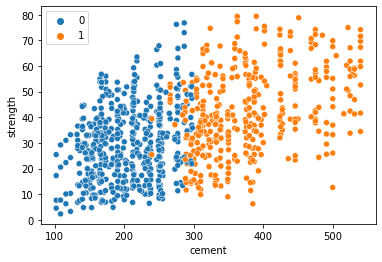

In [48]:
sns.scatterplot(x['cement'],y=y,hue=labels)

In [49]:
def clusters_among_variables(x,y,labels):
    
    columns = list(set(list(x.columns)) - set(data['strength']))
    
    r = int(len(columns)/2)
    
    if r%2 == 0:
        r = r
    else:
        r = r+1
    
    
    f,ax=plt.subplots(r,2,figsize=(15,15))
    a=0
    
    for col in range(0,r):
        for j in range(0,2):
            if a != len(columns):
                ax[col][j].scatter(x[y],x[columns[a]],c=labels)
                ax[col][j].set_xlabel(y)
                ax[col][j].set_ylabel(columns[a])
                a = a+1

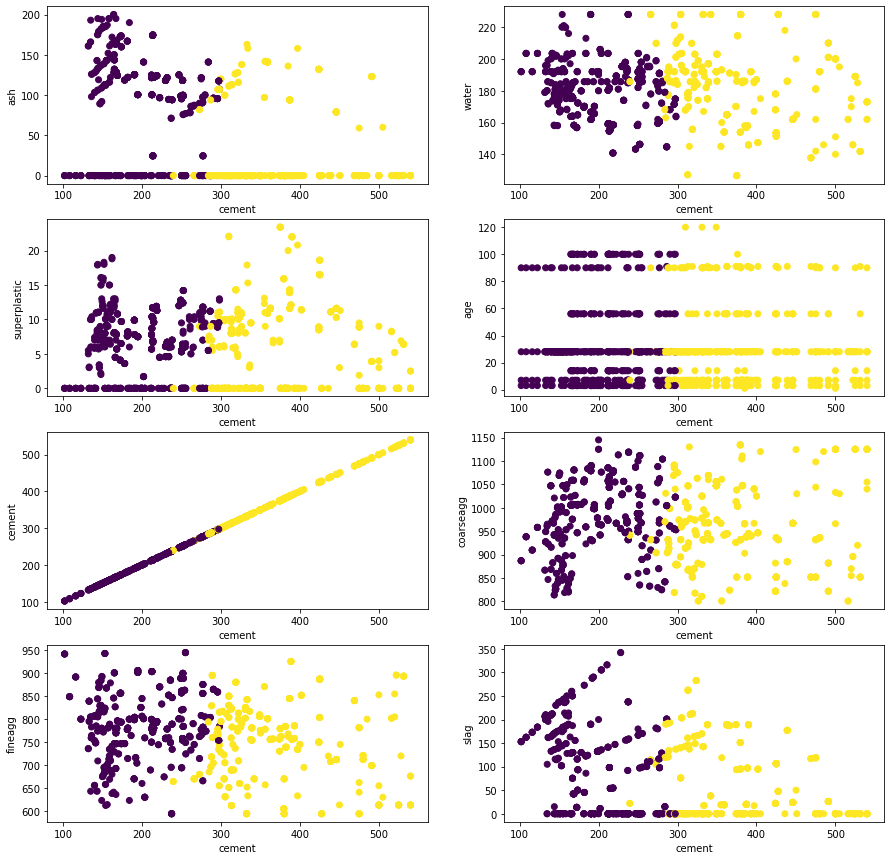

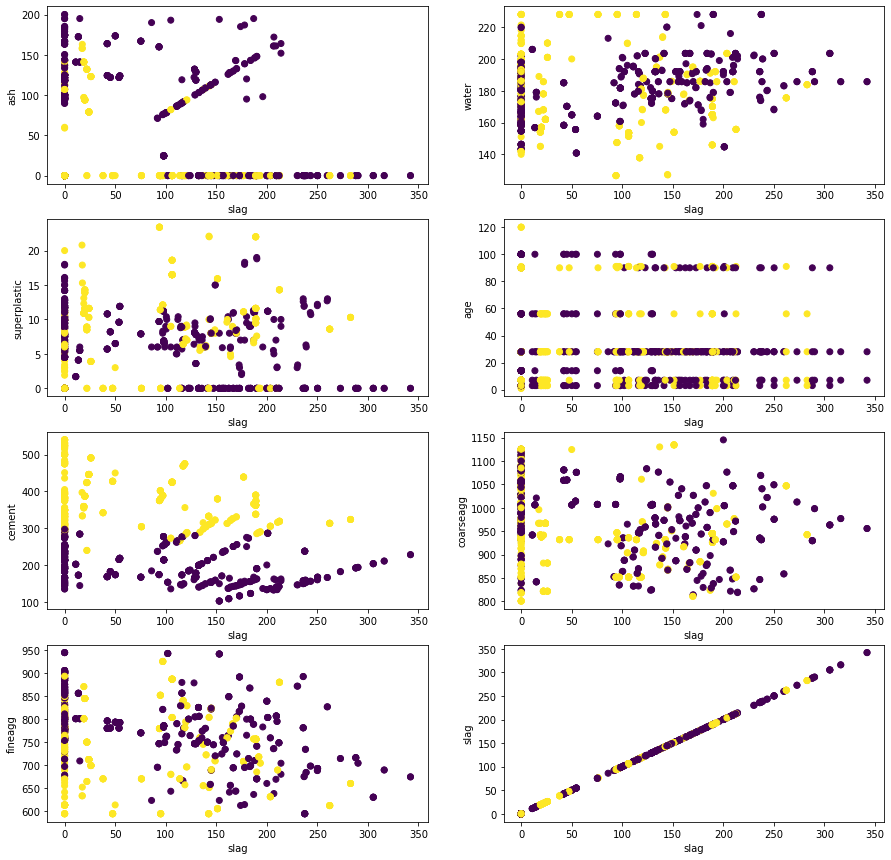

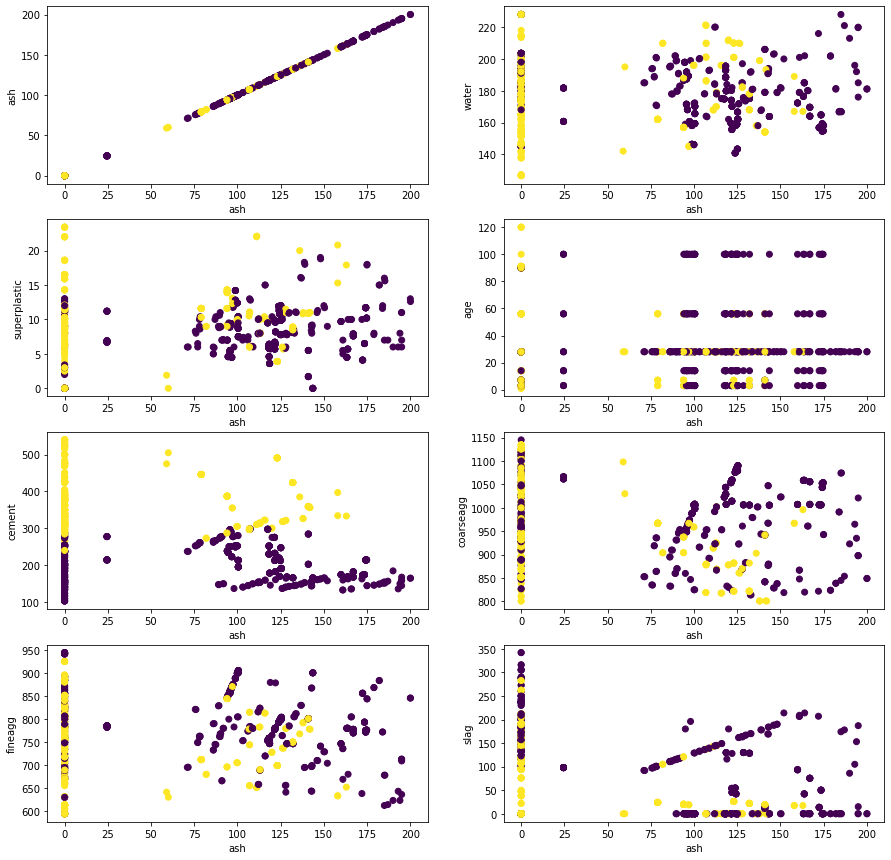

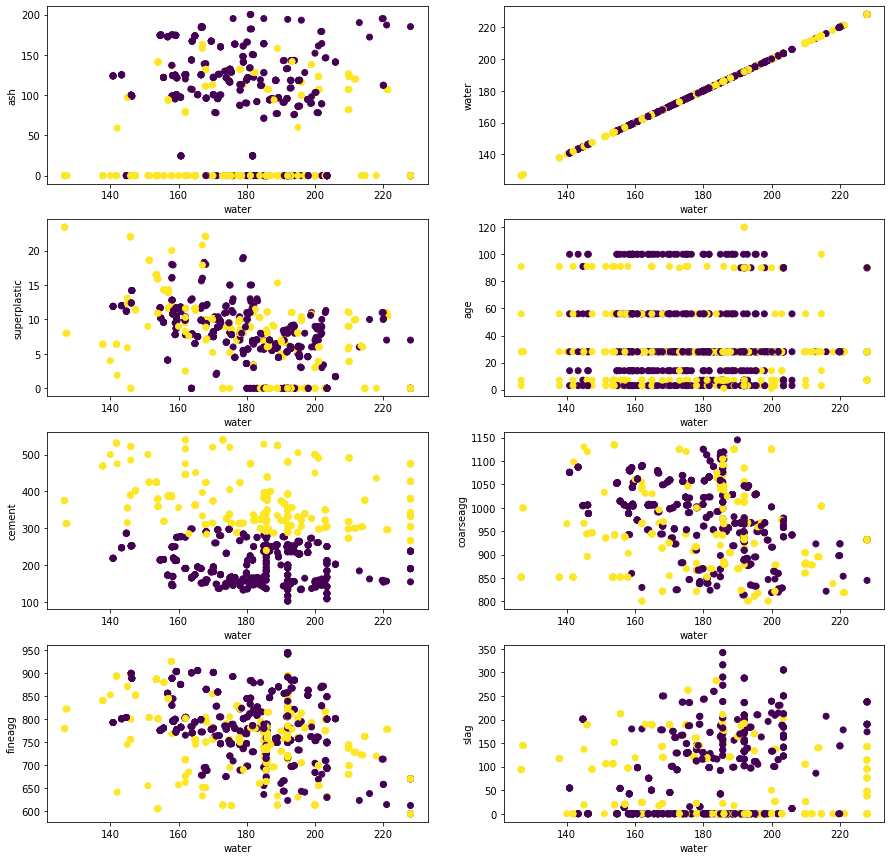

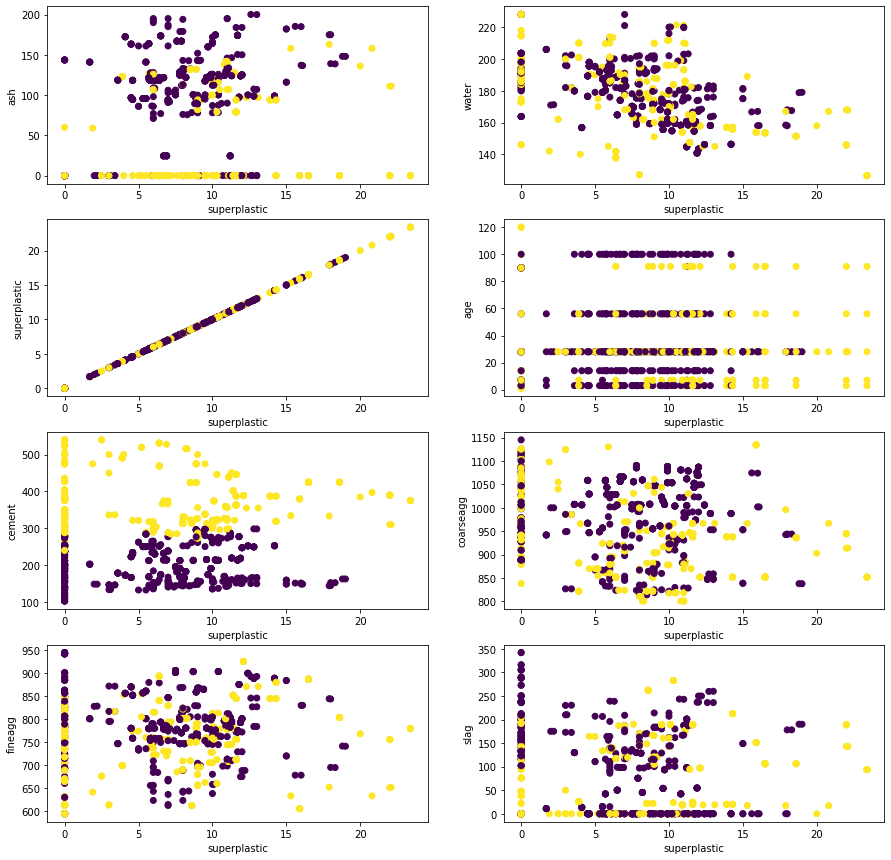

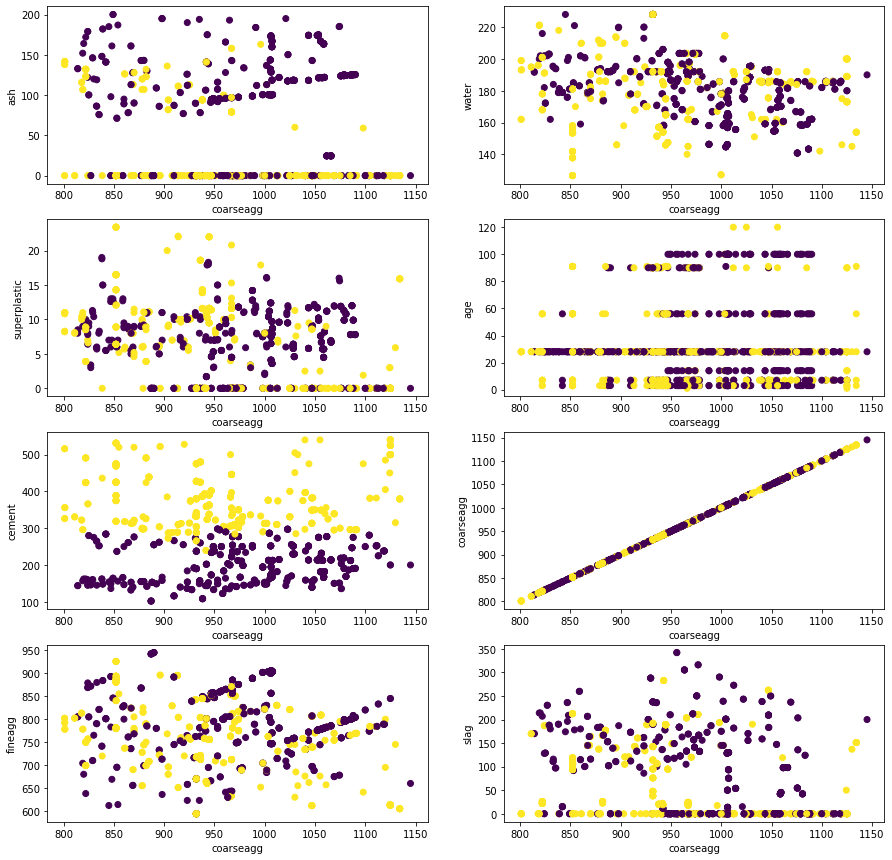

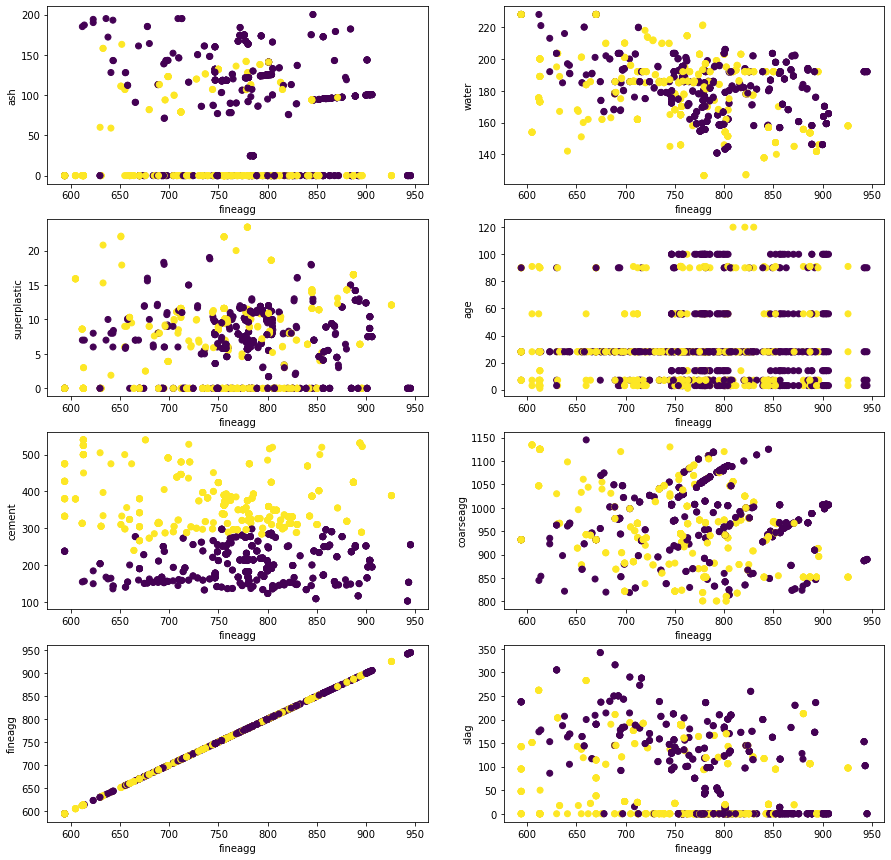

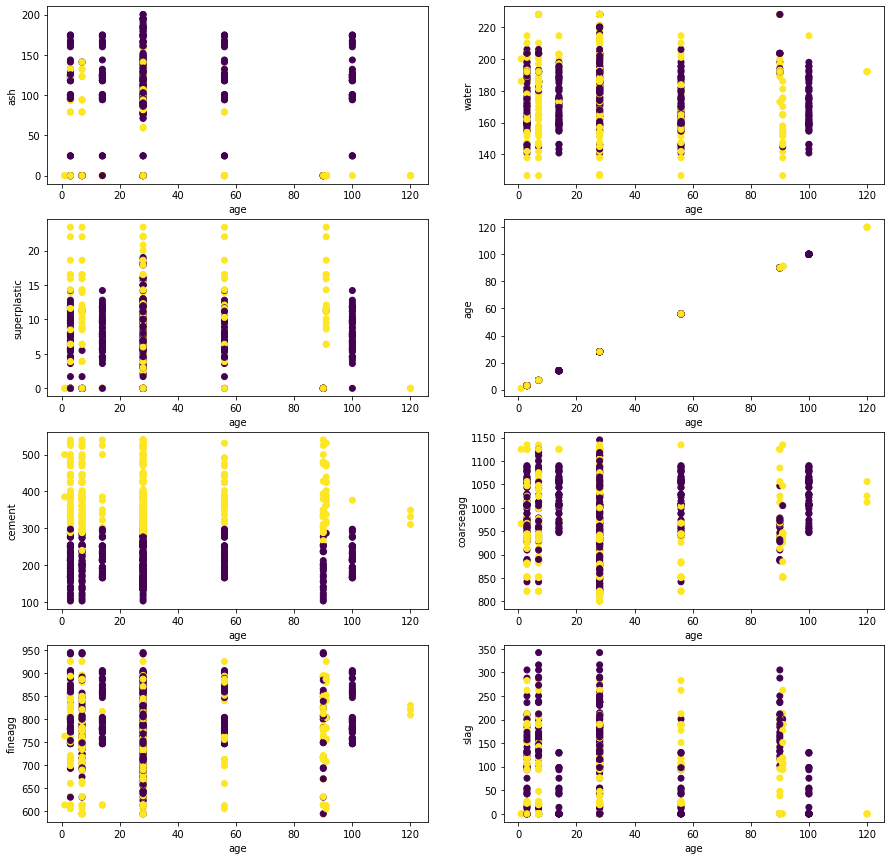

In [50]:
for col in x.columns:
    clusters_among_variables(x,col,labels)

In [51]:
# Observations of clustering

#1. Cement is forming clusters with almost all variables


In [52]:
clusters_df = data.join(pd.DataFrame(data=labels,columns=['labels']),how='left')

In [53]:
clusters_df

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8           6.4      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0   28   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  labels  
0        29.89       0  
1        23.51       0  
2        29.22       0  
3        45.85       1  
4        18.29       0  
...        ...     ...  
1025     13.29       0  
1026     41.30       1  
1027     44.28       0  
1028     55.06       1  
1029     52.61       1  

[1030 rows x 10 columns]

In [54]:
centroid = clusters_df.groupby('labels')['cement'].agg(['mean','median'])

In [55]:
centroid

mean  median
labels                    
0       203.132804   202.0
1       376.731317   362.6

In [56]:
clusters_df = clusters_df.merge(centroid,on='labels',how='left')

In [57]:
clusters_df.drop('labels',axis=1,inplace=True)

In [58]:
clusters_df

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8           6.4      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0   28   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength        mean  median  
0        29.89  203.132804   202.0  
1        23.51  203.132804   202.0  
2        29.22  203.132804   202.0  
3        45.85  376.731317   362.6  
4        18.29  203.132804   202.0  
...        ...         ...     ...  
1025     13.29  203.132804   202.0  
1026     41.30  376.731317   362.6  
1027     44.28  203.132804   202.0  
1028     55.06  376.731317   362.6  
1029     52.61  376.731317   362.6  

[1030 rows x 11 columns]

In [59]:
kfold_cv_hyperparametertuning(clusters_df.drop('strength',axis=1),clusters_df['strength'])

[20:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bi

Model Names  Score Mean  Score Std
8               XGBRegression    0.894791   0.044484
9      RandomForestRegression    0.888739   0.034264
7  GradientBoostingRegression    0.875621   0.045080
3      DecisionTreeRegression    0.835103   0.051279
6          AdaBoostRegression    0.731639   0.040216
0           Linear Regression    0.686817   0.062277
2            Ridge Regression    0.686641   0.062315
1            Lasso Regression    0.686641   0.062314
4        KNeighborsRegression    0.681656   0.080129
5                         SVR    0.246843   0.044778

In [60]:
kfold_cv_hyperparametertuning(transformed_df.drop('strength',axis=1),transformed_df['strength'])

[20:21:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:23:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:23:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bi

Model Names  Score Mean  Score Std
9      RandomForestRegression    0.868186   0.032714
8               XGBRegression    0.866822   0.028699
7  GradientBoostingRegression    0.829390   0.050312
4        KNeighborsRegression    0.771057   0.054397
3      DecisionTreeRegression    0.756688   0.051663
6          AdaBoostRegression    0.728640   0.042990
5                         SVR    0.703117   0.042765
1            Lasso Regression    0.663970   0.059370
2            Ridge Regression    0.663951   0.059242
0           Linear Regression    0.663928   0.059476

## Feature importance

In [61]:
x_train,x_test,y_train,y_test = train_and_test_split(clusters_df,'strength',test_size=0.3)

In [62]:
clusters_df

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8           6.4      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0   28   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength        mean  median  
0        29.89  203.132804   202.0  
1        23.51  203.132804   202.0  
2        29.22  203.132804   202.0  
3        45.85  376.731317   362.6  
4        18.29  203.132804   202.0  
...        ...         ...     ...  
1025     13.29  203.132804   202.0  
1026     41.30  376.731317   362.6  
1027     44.28  203.132804   202.0  
1028     55.06  376.731317   362.6  
1029     52.61  376.731317   362.6  

[1030 rows x 11 columns]

In [63]:
xgb = XGBRegressor()

In [64]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

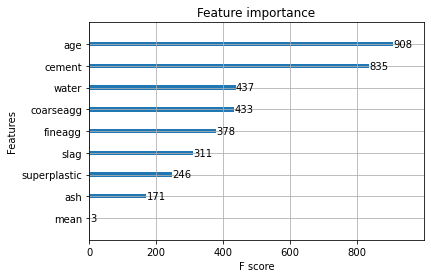

In [65]:
xgboost.plot_importance(xgb)

In [66]:
xgb_pred = xgb.predict(x_test)

In [67]:
xgb_score = r2_score(y_test,xgb_pred)

In [68]:
xgb_score

0.8833601051147343

In [69]:
xgb_rmse = np.sqrt(mean_squared_error(y_test,xgb_pred))

In [70]:
xgb_rmse

5.817085413025686

In [71]:
sort(xgb.feature_importances_)

array([0.        , 0.03413275, 0.04050871, 0.0435516 , 0.04880828,
       0.10692826, 0.12245787, 0.14362495, 0.22871447, 0.23127314],
      dtype=float32)

In [73]:
l = []
threshold = sort(xgb.feature_importances_)
for t in threshold:
    selection = SelectFromModel(xgb,threshold=t,prefit=True)
    select_x_train = selection.transform(x_train)
    selected_model = XGBRegressor()
    selected_model.fit(select_x_train,y_train)
    select_x_test = selection.transform(x_test)
    xgb_predict = selected_model.predict(select_x_test)
    result = [t,select_x_train.shape[1],np.sqrt(mean_squared_error(y_test,xgb_predict)),r2_score(y_test,xgb_predict)]
    l.append(result)
    
result_df = pd.DataFrame(l,columns=['Threshold','No. Of Features','RMSE','R2 Score'])
result_df

Threshold  No. Of Features       RMSE  R2 Score
0   0.000000               10   5.817085  0.883360
1   0.034133                9   5.817085  0.883360
2   0.040509                8   5.350307  0.901328
3   0.043552                7   5.646046  0.890118
4   0.048808                6   5.556320  0.893583
5   0.106928                5   5.586327  0.892431
6   0.122458                4   5.559885  0.893446
7   0.143625                3   7.153407  0.823615
8   0.228714                2   9.076500  0.716030
9   0.231273                1  13.247394  0.395081

In [74]:
x_train

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
339    236.0  157.0    0.0  192.0           0.0      972.6    749.1   90   
809    108.3  162.4    0.0  203.5           0.0      938.2    849.0    7   
785    190.3    0.0  125.2  166.6           9.9     1079.0    798.9  100   
939    312.9  160.5    0.0  177.6           9.6      916.6    759.5   28   
722    249.1    0.0   98.8  158.1          12.8      987.8    889.0   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
229    425.0  106.3    0.0  151.4          18.6      936.0    803.7   56   
70     200.0  133.0    0.0  192.0           0.0      965.4    806.2    3   
132    236.0    0.0    0.0  193.0           0.0      968.0    885.0    7   
109    326.5    0.0  137.9  199.0          10.8      801.1    792.5   28   

            mean  median  
339   203.132804   202.0  
809   203.132804   202.0  
785   203.132804   202.0  
939   376.731317   362.6  
722   203.132804   202.0  
...          ...     ...  
1027  203.132804   202.0  
229   376.731317   362.6  
70    203.132804   202.0  
132   203.132804   202.0  
109   376.731317   362.6  

[721 rows x 10 columns]

In [75]:
x1=x_train.drop(['ash','mean','median'],axis=1)

In [76]:
x1

cement   slag  water  superplastic  coarseagg  fineagg  age
339    236.0  157.0  192.0           0.0      972.6    749.1   90
809    108.3  162.4  203.5           0.0      938.2    849.0    7
785    190.3    0.0  166.6           9.9     1079.0    798.9  100
939    312.9  160.5  177.6           9.6      916.6    759.5   28
722    249.1    0.0  158.1          12.8      987.8    889.0   28
...      ...    ...    ...           ...        ...      ...  ...
1027   276.4  116.0  179.6           8.9      870.1    768.3   28
229    425.0  106.3  151.4          18.6      936.0    803.7   56
70     200.0  133.0  192.0           0.0      965.4    806.2    3
132    236.0    0.0  193.0           0.0      968.0    885.0    7
109    326.5    0.0  199.0          10.8      801.1    792.5   28

[721 rows x 7 columns]

In [77]:
y1 = y_train

In [78]:
y1

339     47.78
809      7.72
785     33.56
939     52.45
722     30.85
        ...  
1027    44.28
229     64.90
70      11.41
132      9.99
109     38.63
Name: strength, Length: 721, dtype: float64

In [79]:
kfold_cv_hyperparametertuning(x1,y1)

[20:32:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:32:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:32:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bi

Model Names  Score Mean  Score Std
8               XGBRegression    0.871870   0.040920
9      RandomForestRegression    0.868649   0.046874
7  GradientBoostingRegression    0.857497   0.046377
3      DecisionTreeRegression    0.776037   0.047782
6          AdaBoostRegression    0.735092   0.048975
1            Lasso Regression    0.663235   0.090212
2            Ridge Regression    0.663235   0.090216
0           Linear Regression    0.663233   0.090218
4        KNeighborsRegression    0.613586   0.098686
5                         SVR    0.204525   0.034882

## Plotting Learning Curve

In [80]:
def plot_learning_curve(modelname,model):
    train_size,train_score,test_score = learning_curve(estimator=model,X=x1,y=y1,cv=10)
    train_score_mean = np.mean(train_score,axis=1)
    test_score_mean = np.mean(test_score,axis=1)
    plt.plot(train_size,train_score_mean,color='blue')
    plt.plot(train_size,test_score_mean,color='red')
    plt.xlabel('sample')
    plt.ylabel('accuracy')
    plt.title('Learning Curve of '+modelname)
    plt.legend(('Training Score','Testing Score'))

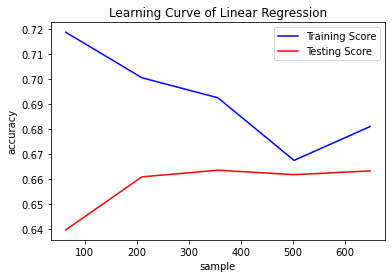

In [81]:
plot_learning_curve('Linear Regression',LinearRegression())

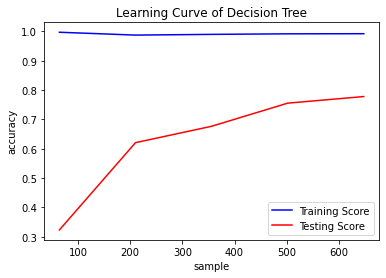

In [82]:
plot_learning_curve('Decision Tree',DecisionTreeRegressor())

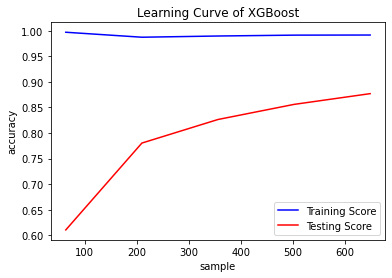

In [83]:
plot_learning_curve('XGBoost',XGBRegressor())

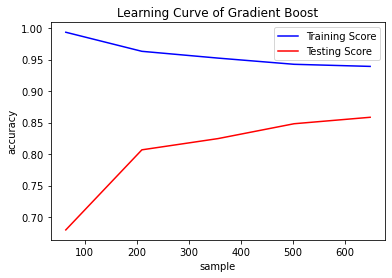

In [84]:
plot_learning_curve('Gradient Boost',GradientBoostingRegressor())

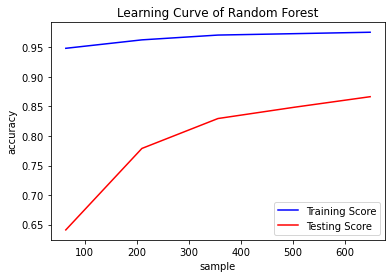

In [85]:
plot_learning_curve('Random Forest',RandomForestRegressor())